In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import FashionMNIST

data = FashionMNIST(root=".", download=True)
sample_data = data.data[0]
sample_data = sample_data.unsqueeze(0).numpy()

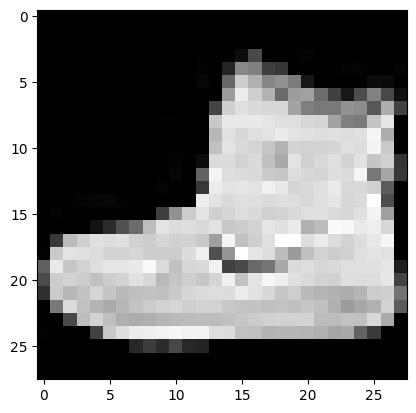

In [2]:
plt.imshow(sample_data.transpose(1, 2, 0), cmap="gray")
plt.show()

In [3]:
C, H, W = sample_data.shape

pad = 0
stride = 1
filter_size = (9, 9)

out_h = (H + 2*pad - filter_size[0]) // stride + 1
out_w = (W + 2*pad - filter_size[1]) // stride + 1

out_h, out_w

(20, 20)

In [4]:
padded_image = np.pad(sample_data, [(0, 0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((C, filter_size[0], filter_size[1], out_h, out_w))

for y in range(filter_size[0]):
    y_max = y + stride * out_h
    
    for x in range(filter_size[1]):
        x_max = x + stride * out_w
        
        col[:, y, x, :, :] = padded_image[:, y:y_max:stride, x:x_max:stride]
#         plt.imshow(padded_image[:, y:y_max:stride, x:x_max:stride].transpose(1, 2, 0), cmap="gray")
#         plt.show()

col.shape

(1, 9, 9, 20, 20)

In [5]:
col = col.transpose(3, 4, 0, 1, 2)
col.shape

(20, 20, 1, 9, 9)

In [6]:
col = col.reshape(out_h * out_w, 1, filter_size[0], filter_size[1]).transpose(0, 2, 3, 1)
col.shape

(400, 9, 9, 1)

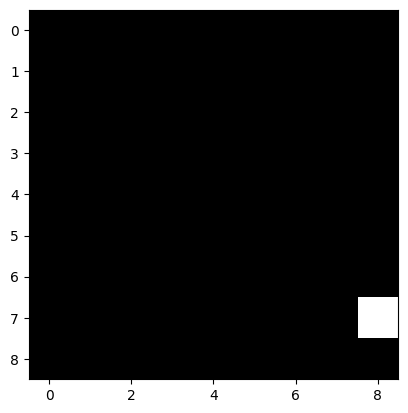

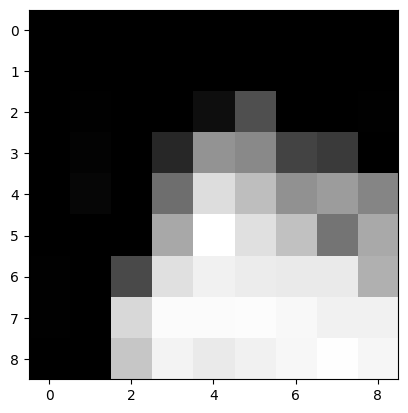

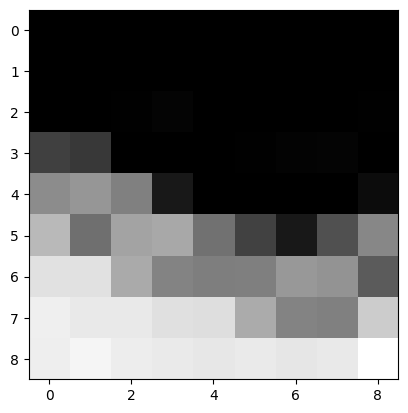

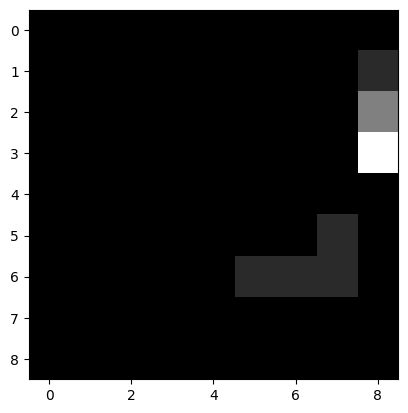

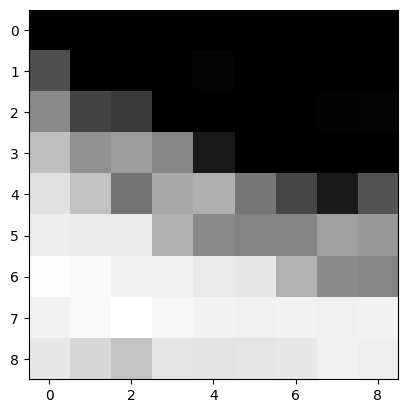

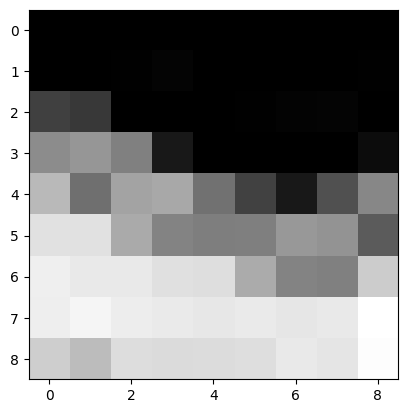

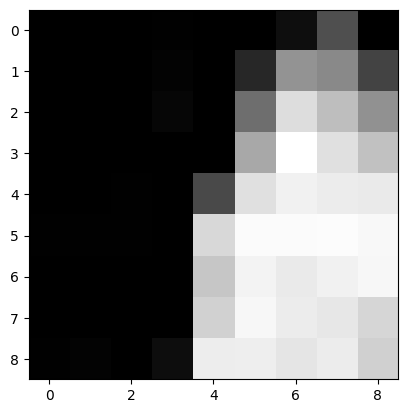

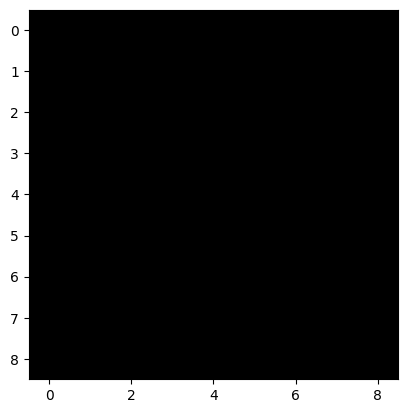

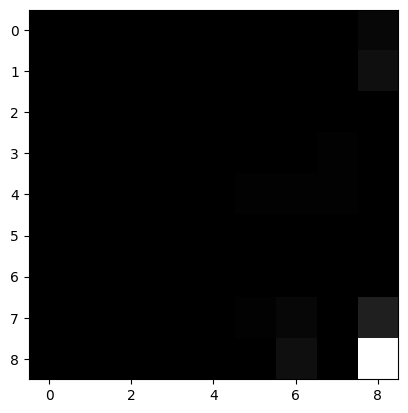

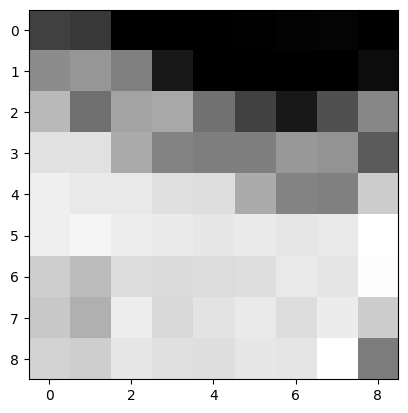

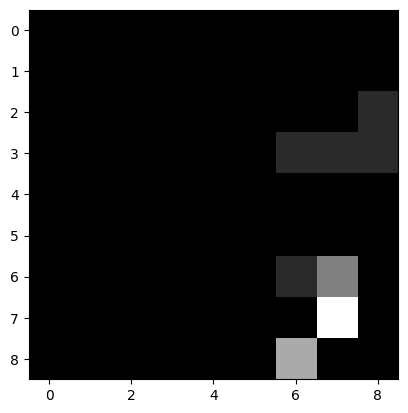

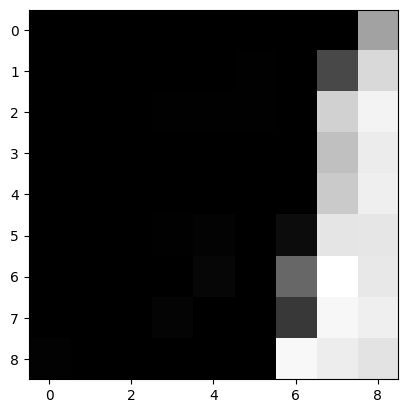

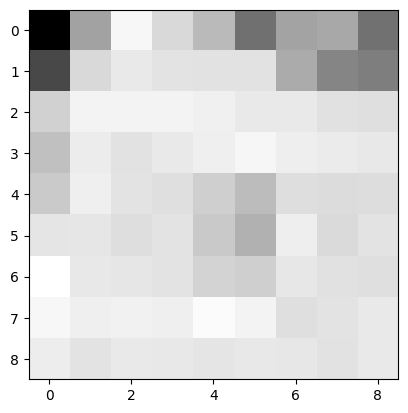

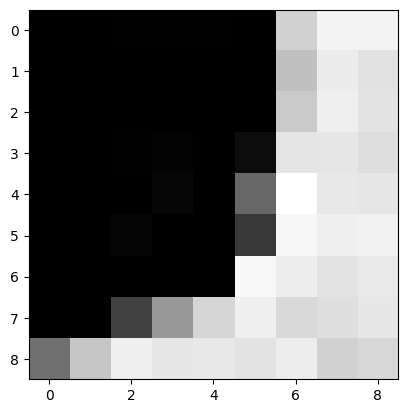

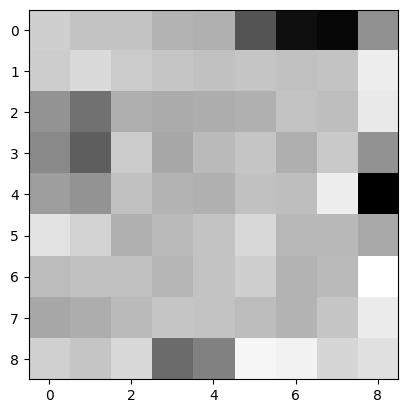

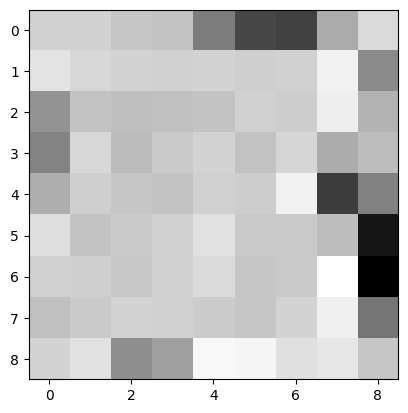

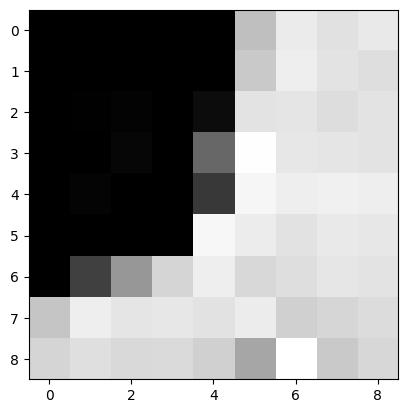

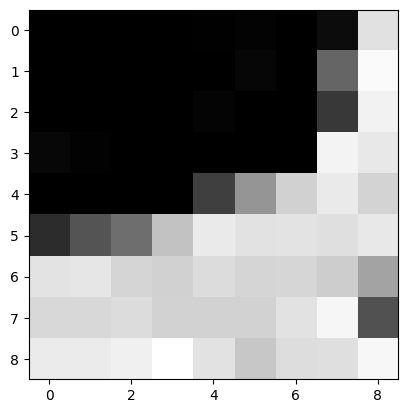

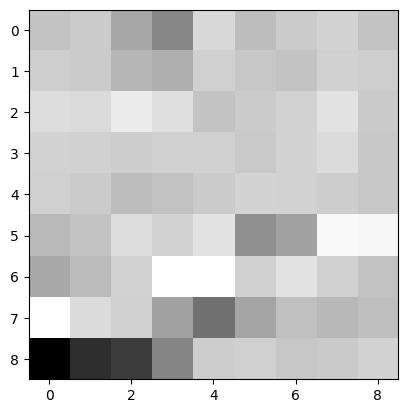

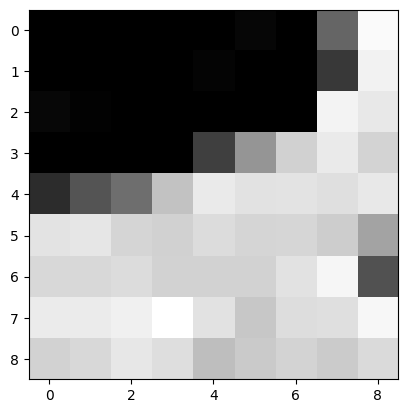

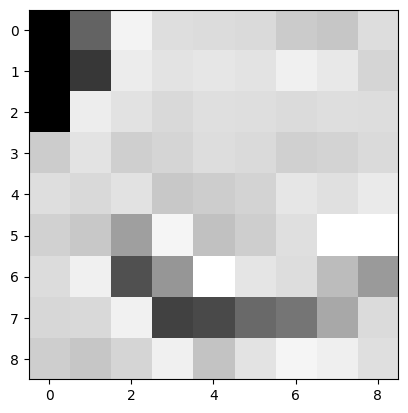

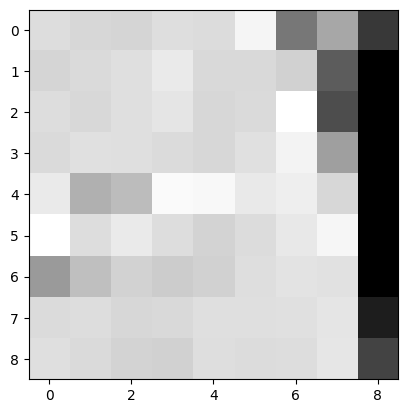

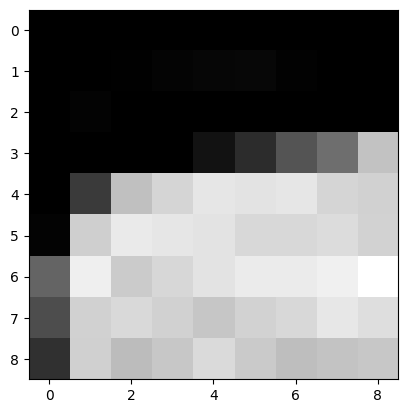

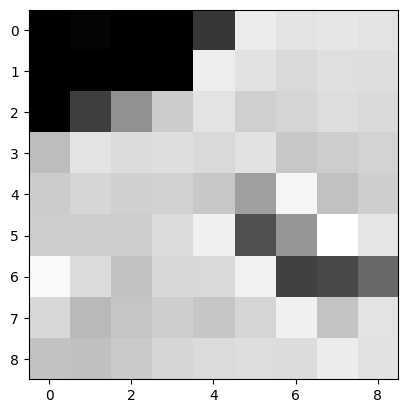

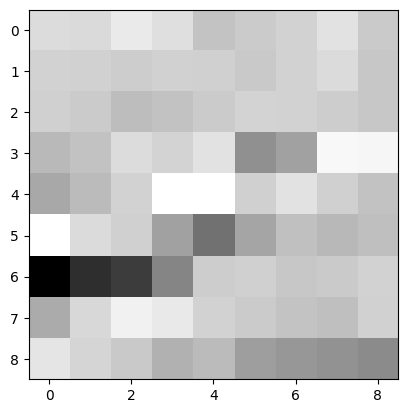

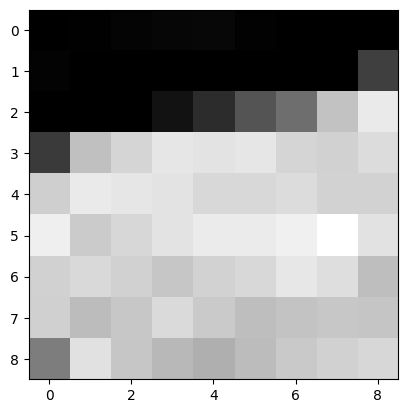

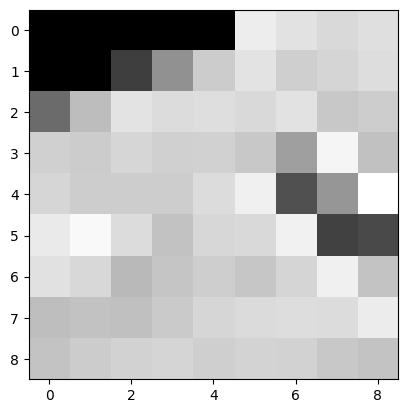

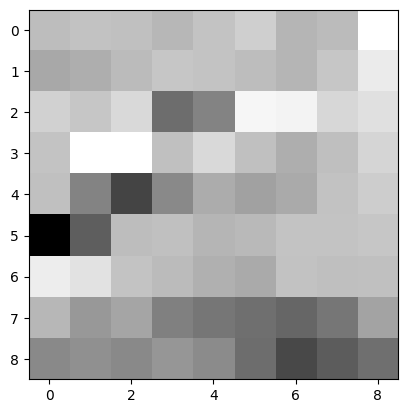

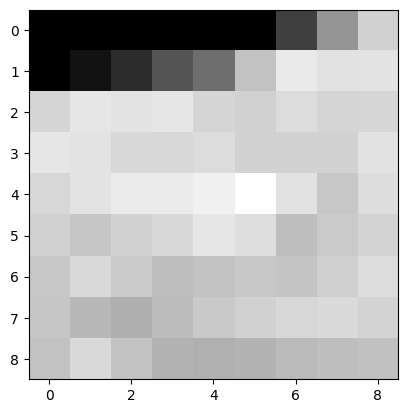

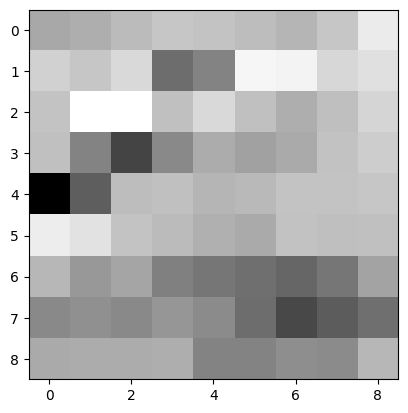

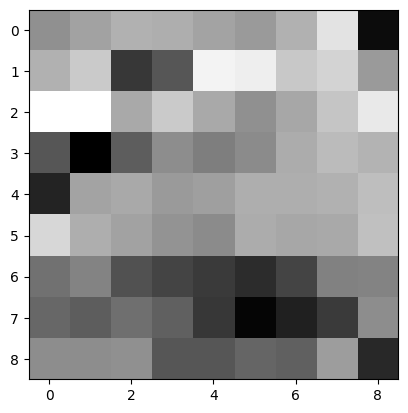

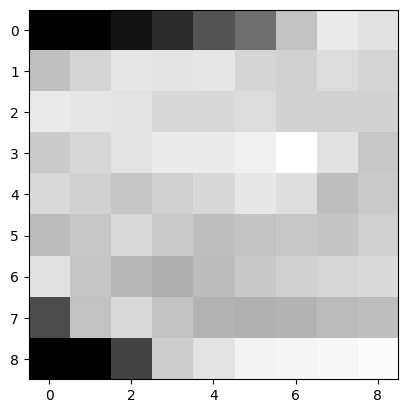

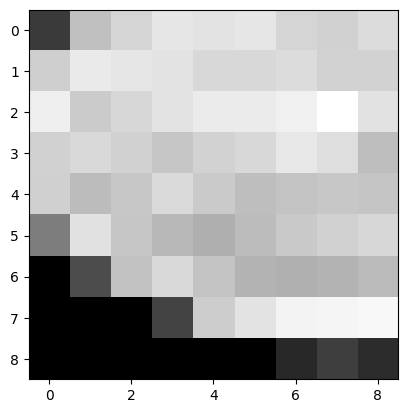

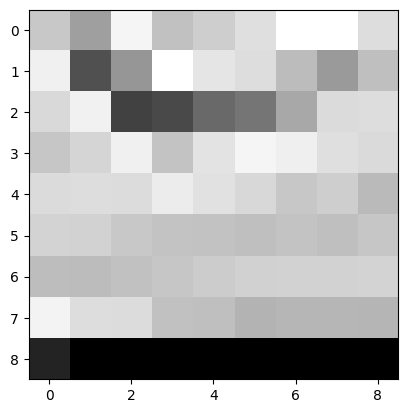

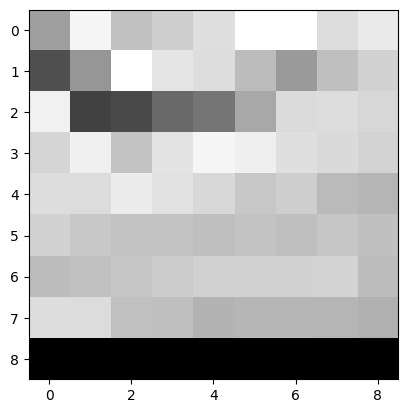

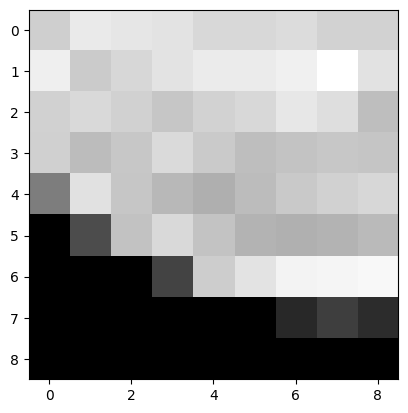

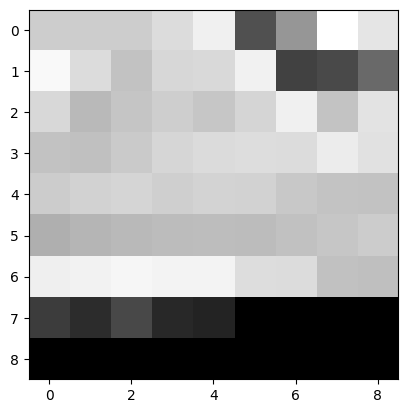

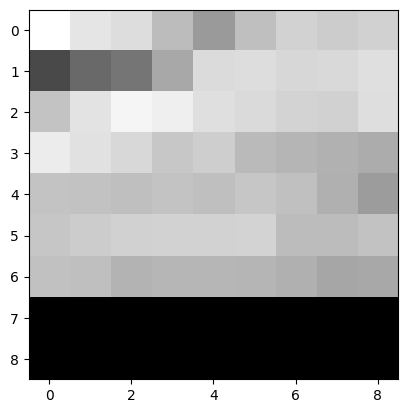

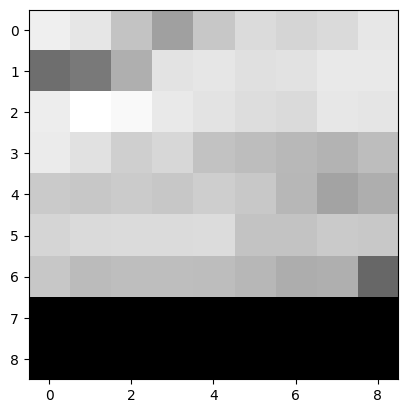

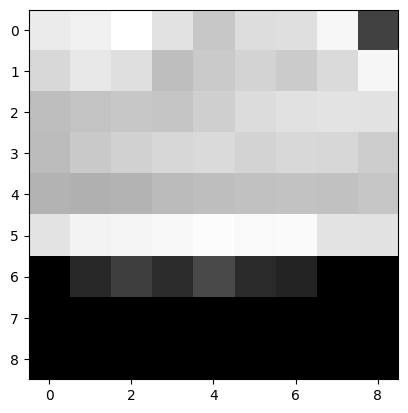

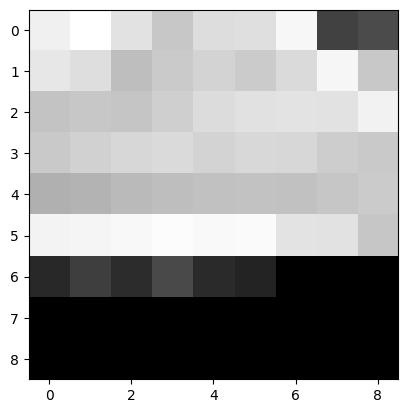

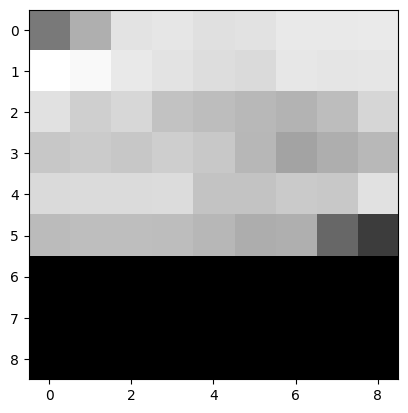

In [7]:
import random

for i in range(col.shape[0]):
    if random.random() < 0.1:
        plt.imshow(col[i, :, :, :], cmap="gray")
        plt.show()

In [8]:
col = col.reshape(out_h * out_w, -1)
col.shape

(400, 81)